<div style="text-align: right;font-weight:bold;font-size:large">Till Pfaff<br>3789265</div>

### 7. Density of states for the 1D Ising model
Use your computer program of problem 5 for the exact enumeration of
all states of the 1D Ising model with free boundary conditions (without external field, i.e., $h = 0$) to determine the density of states
$\Omega(E, M)$ for $N = 20$ spins. Here $E$ is the energy of a spin configuration ($s_1, s_2, ... , s_N$) and $M = \sum^N_{i=1} s_i$
the associated magnetisation.

**a)** Use $\Omega(E, M)$ to find $\langle E\rangle (T)$ and the specific heat $C(T)$ in the field
free case ($h = 0$). Plot both functions in the interval $T \in (0, 2]$.


```cpp
std::vector<std::vector<int>> omega5(){
    int E = 0;
	int M = 0;

	//Number of columns
	int num_M = 6;

	// Number of rows
	int num_E = 5;

	// Initializing a single row
	std::vector<int> row(num_E, 0);

    std::vector<std::vector<int>> omega (num_M,row);

	for(int s0 = -1; s0 < 2; s0 += 2){
		for(int s1 = -1; s1 < 2; s1 += 2){
			for(int s2 = -1; s2 < 2; s2 += 2){
				for(int s3 = -1; s3 < 2; s3 += 2){
					for(int s4 = -1; s4 < 2; s4 += 2){
                        E = s0*s1 + s1*s2 + s2*s3 + s3*s4;
						M = s0+s1+s2+s3+s4;
                        omega[M2i(M,5)][E2i(E,5)]++;
					}
				}
			}
		}
	}
	return omega;
}
```

In [41]:
import numpy as np
import matplotlib.pyplot as plt


In [42]:
#for N=20
!./task7

In [43]:
omega = np.loadtxt("out/omega.txt", dtype=int)
omega.shape

(20, 21)

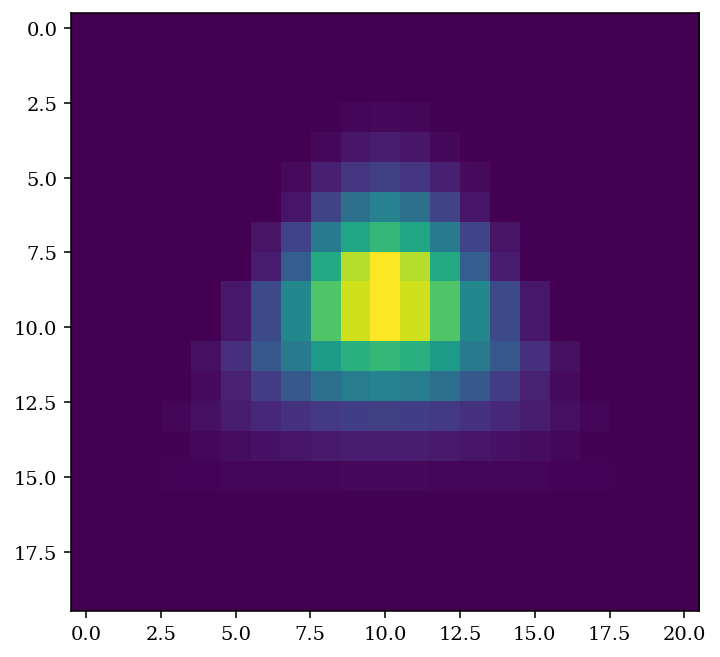

In [44]:
omega.shape
plt.imshow(omega)
plt.show()

In [45]:
E = np.arange(-19,20,2)
omega_E = np.sum(omega,axis=1)

print(E.shape,omega_E.shape)

(20,) (20,)


In [46]:
def Z(T):
    return np.sum(omega_E * np.exp(-E/T))
def avg_E(T):
    return 1/Z(T) * np.sum(omega_E * E * np.exp(-E/T))

/tmp/ipykernel_7834/1506011558.py:2: RuntimeWarning: overflow encountered in exp
  return np.sum(omega_E * np.exp(-E/T))
/tmp/ipykernel_7834/1506011558.py:4: RuntimeWarning: overflow encountered in exp
  return 1/Z(T) * np.sum(omega_E * E * np.exp(-E/T))
/tmp/ipykernel_7834/1506011558.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return 1/Z(T) * np.sum(omega_E * E * np.exp(-E/T))


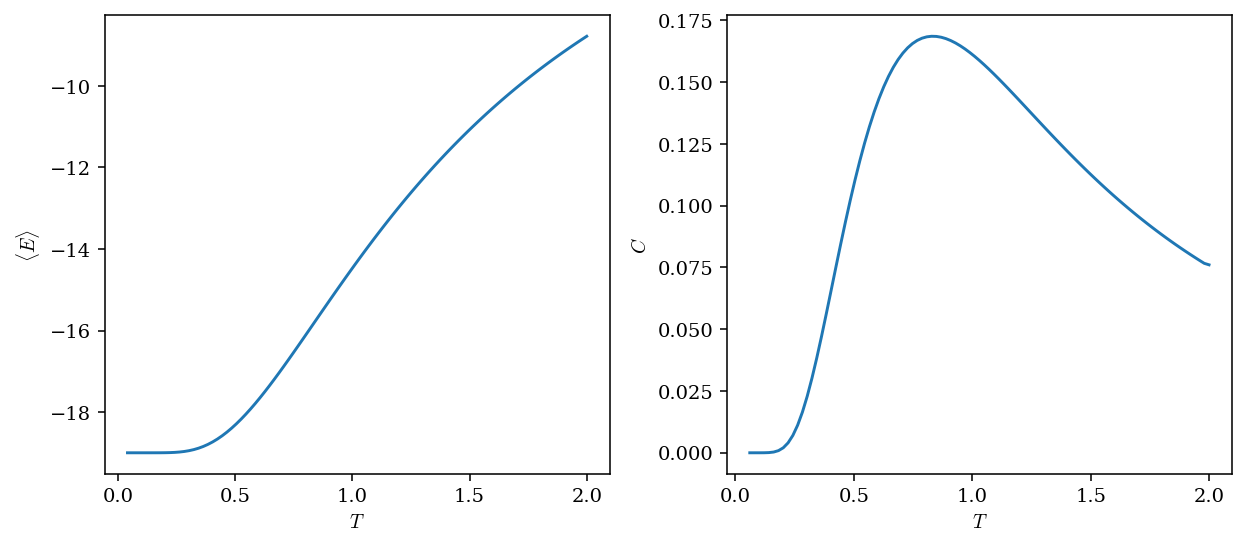

In [47]:
T = np.linspace(0,2,100)[1:]
avg_E_arr = np.array([avg_E(T_val) for T_val in T])
C_arr = np.gradient(avg_E_arr)
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
plt.ylabel(r"$\langle E \rangle$")
plt.xlabel(r"$T$")
plt.plot(T,avg_E_arr)
plt.subplot(1,2,2)
plt.ylabel(r"$C$")
plt.xlabel(r"$T$")
plt.plot(T,C_arr)
plt.show()

**b)** Determine $\langle E\rangle (T)$ and $\langle M\rangle (T)$ by means of $\Omega(E, M)$ for $h \neq 0$
and plot both quantities at $h = 0.5$ for $T \in (0, 2]$.


In [50]:
E = np.arange(-19,20,2)
M = np.arange(-20,21,2)

def Z_b(T):
    return np.sum(np.exp(-E/T) * np.sum(omega * np.exp(+0.5*M/T), axis=1))
def avg_E_b(T):
    return 1/Z_b(T) * np.sum(np.exp(-E/T) * E * np.sum(omega * np.exp(+0.5*M/T), axis=1))
def avg_M_b(T):
    return 1/Z_b(T) * np.sum(np.exp(-E/T) * np.sum(omega * M * np.exp(+0.5*M/T), axis=1))

/tmp/ipykernel_7834/1926348648.py:5: RuntimeWarning: overflow encountered in exp
  return np.sum(np.exp(-E/T) * np.sum(omega * np.exp(+0.5*M/T), axis=1))
/tmp/ipykernel_7834/1926348648.py:5: RuntimeWarning: overflow encountered in multiply
  return np.sum(np.exp(-E/T) * np.sum(omega * np.exp(+0.5*M/T), axis=1))
/tmp/ipykernel_7834/1926348648.py:7: RuntimeWarning: overflow encountered in exp
  return 1/Z_b(T) * np.sum(np.exp(-E/T) * E * np.sum(omega * np.exp(+0.5*M/T), axis=1))
/tmp/ipykernel_7834/1926348648.py:7: RuntimeWarning: overflow encountered in multiply
  return 1/Z_b(T) * np.sum(np.exp(-E/T) * E * np.sum(omega * np.exp(+0.5*M/T), axis=1))
/tmp/ipykernel_7834/1926348648.py:7: RuntimeWarning: invalid value encountered in double_scalars
  return 1/Z_b(T) * np.sum(np.exp(-E/T) * E * np.sum(omega * np.exp(+0.5*M/T), axis=1))
/tmp/ipykernel_7834/1926348648.py:9: RuntimeWarning: overflow encountered in exp
  return 1/Z_b(T) * np.sum(np.exp(-E/T) * np.sum(omega * M * np.exp(+0.5*M/T),

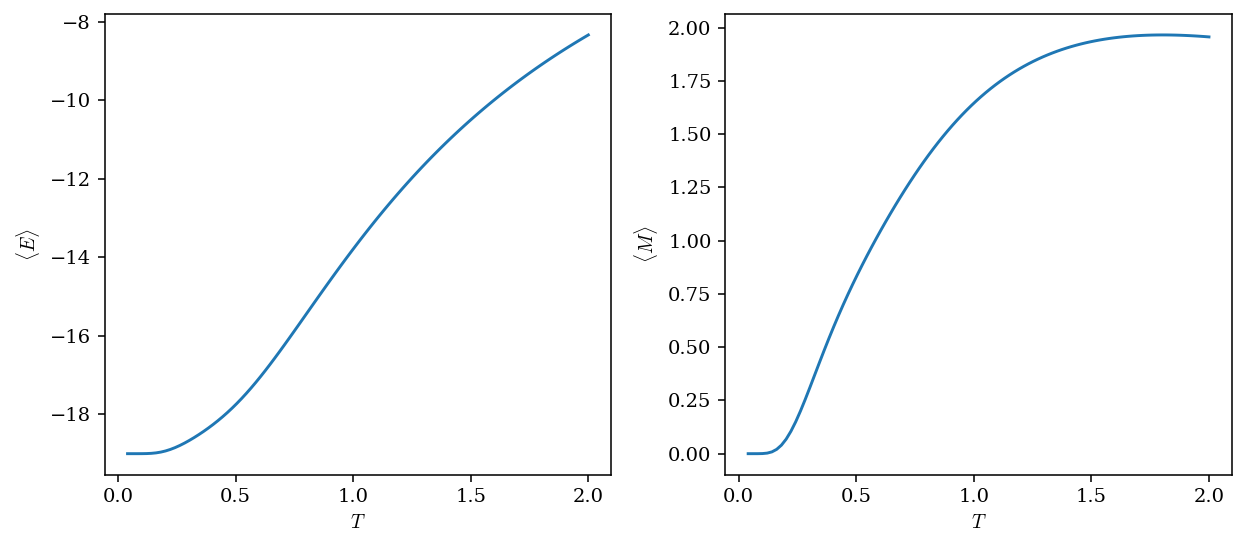

In [51]:
T = np.linspace(0,2,100)[1:]
avg_E_b_arr = np.array([avg_E_b(T_val) for T_val in T])
avg_M_b_arr = np.array([avg_M_b(T_val) for T_val in T])
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
plt.ylabel(r"$\langle E \rangle$")
plt.xlabel(r"$T$")
plt.plot(T,avg_E_b_arr)
plt.subplot(1,2,2)
plt.ylabel(r"$\langle M \rangle$")
plt.xlabel(r"$T$")
plt.plot(T,avg_M_b_arr)
plt.show()

**c)** The purely energetic density of states $\Omega(E)$, where one does not
distinguish between different magnetisations, can be calculated
exactly for an arbitrary number of spins $N$. Derive this result and
verify it with the exact enumeration data.